$\textbf{PROGRAMMING ASSIGNMENT}$
---
# CIA Country Analysis and Clustering

Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with K-Means Clustering
----

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 1. Perform Exploratory Data Analysis

-----

In [5]:
data = pd.read_csv('cia_factbook.csv')
data = data.rename(columns={'country': 'country', 'area': 'area', 'birth_rate': 'birth_rate',
                        'death_rate': 'death_rate', 'infant_mortality_rate': 'infant_mortality_rate',
                        'internet_users': 'internet_users', 'life_exp_at_birth': 'life_exp_at_birth',
                        'maternal_mortality_rate': 'maternal_mortality_rate', 'net_migration_rate': 'net_migration_rate',
                        'population': 'population', 'population_growth_rate': 'population_growth_rate'})
print(data)

data.info()

              country        area  birth_rate  death_rate  \
0              Russia  17098242.0       11.87       13.83   
1              Canada   9984670.0       10.29        8.31   
2       United States   9826675.0       13.42        8.15   
3               China   9596960.0       12.17        7.44   
4              Brazil   8514877.0       14.72        6.54   
..                ...         ...         ...         ...   
254     Bouvet Island        49.0         NaN         NaN   
255     Palmyra Atoll        12.0         NaN         NaN   
256          Akrotiri       123.0         NaN         NaN   
257    European Union         NaN         NaN         NaN   
258  Saint Barthelemy         NaN         NaN         NaN   

     infant_mortality_rate  internet_users  life_exp_at_birth  \
0                     7.08      40853000.0              70.16   
1                     4.71      26960000.0              81.67   
2                     6.17     245000000.0              79.56   
3      

In [14]:
data.isna().sum()

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64

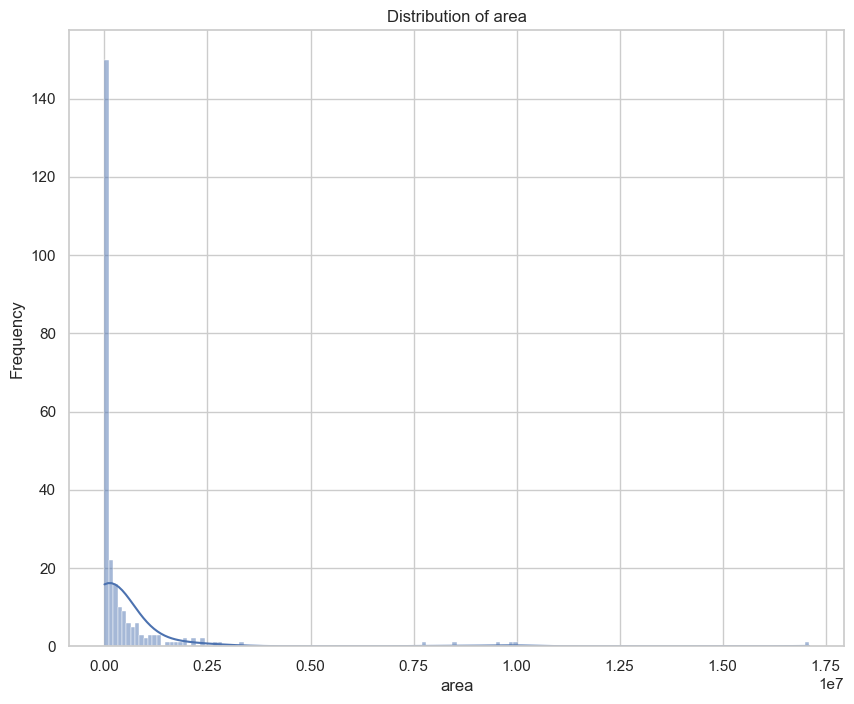

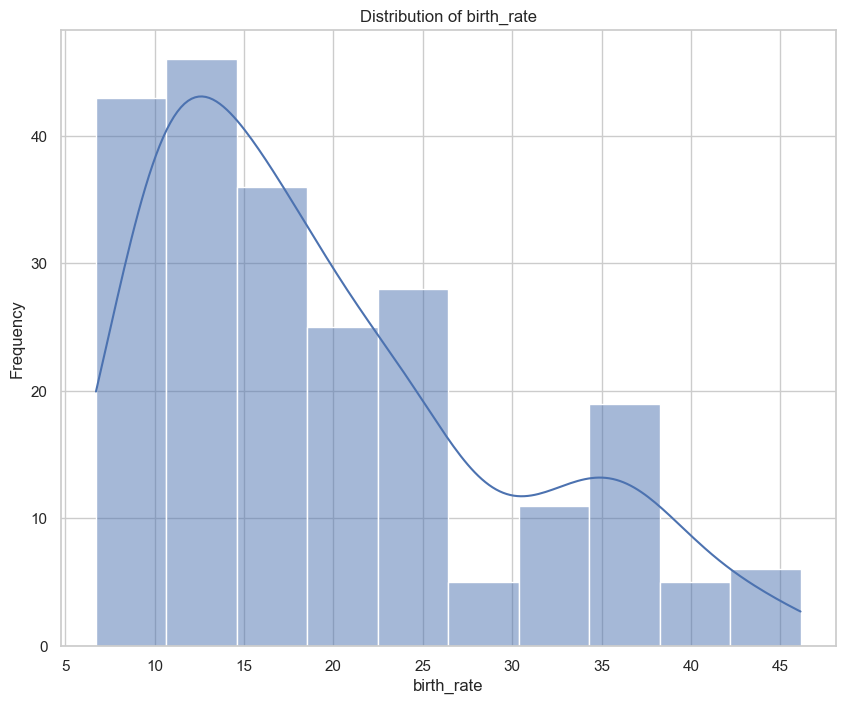

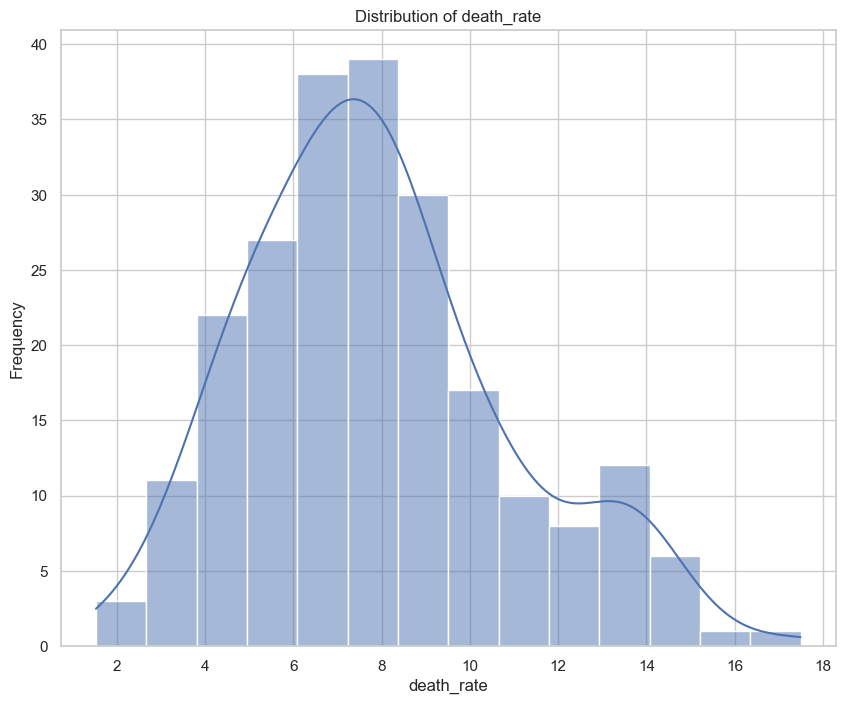

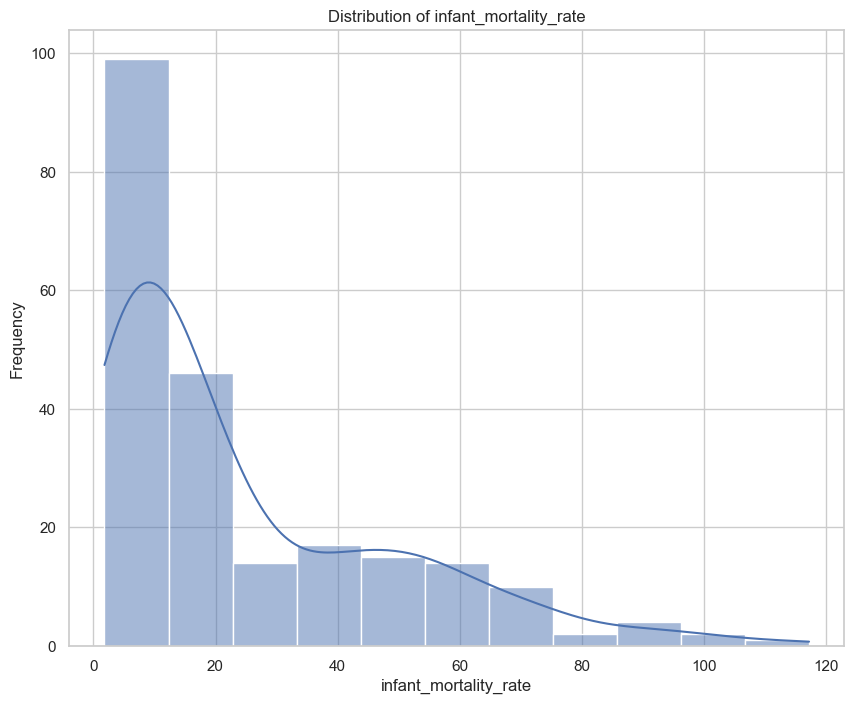

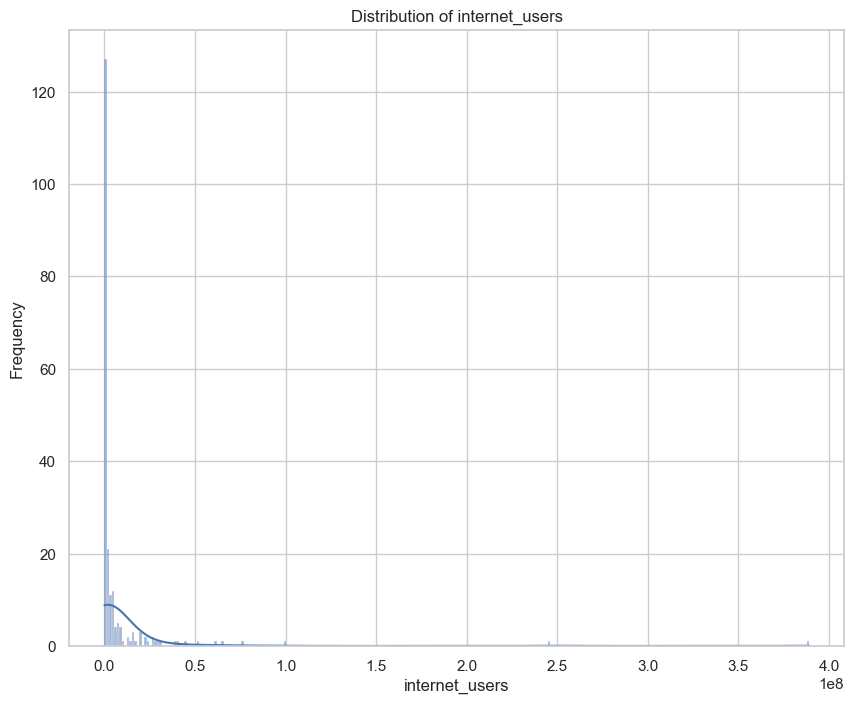

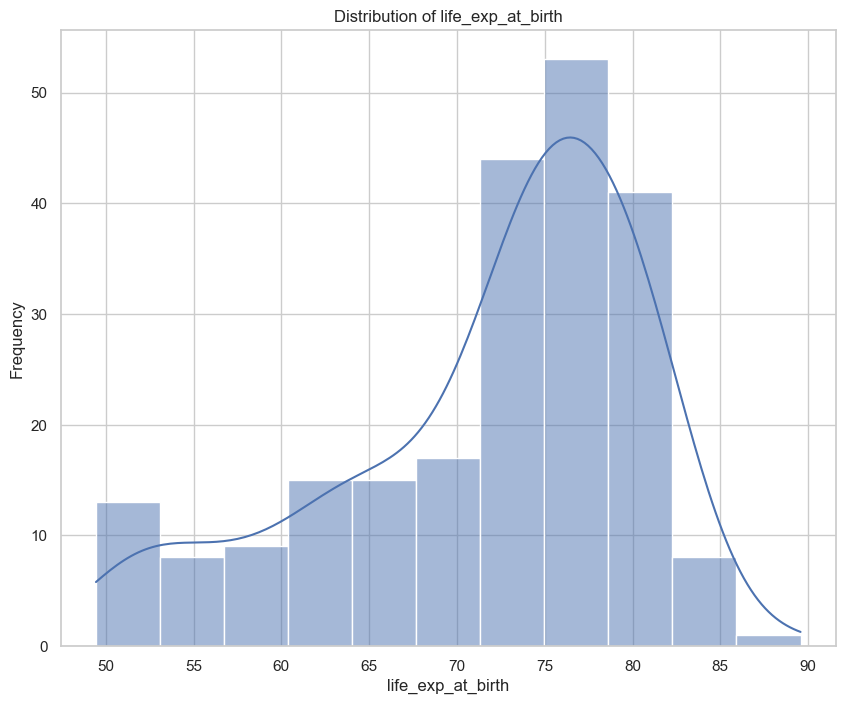

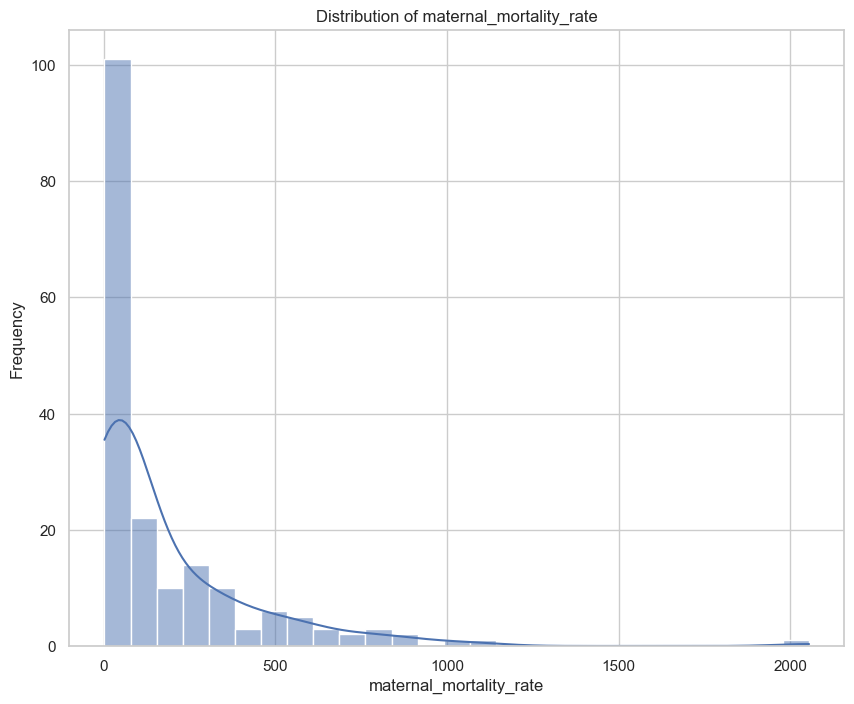

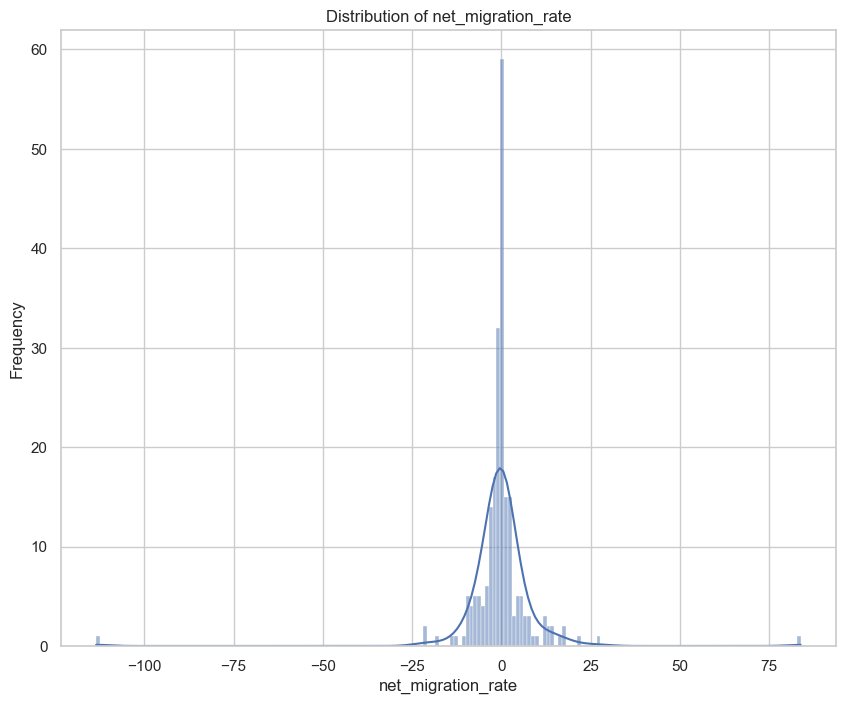

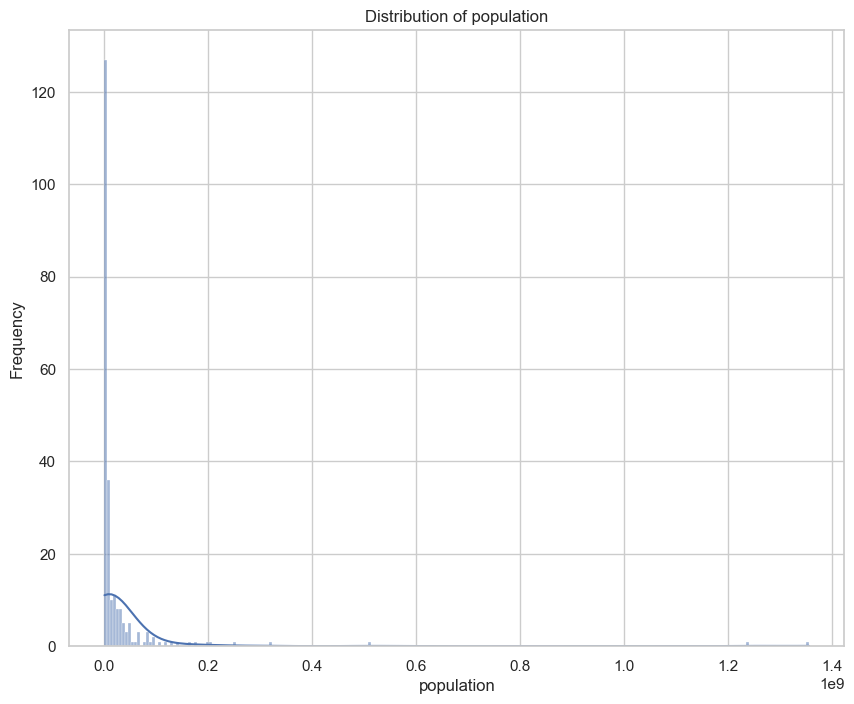

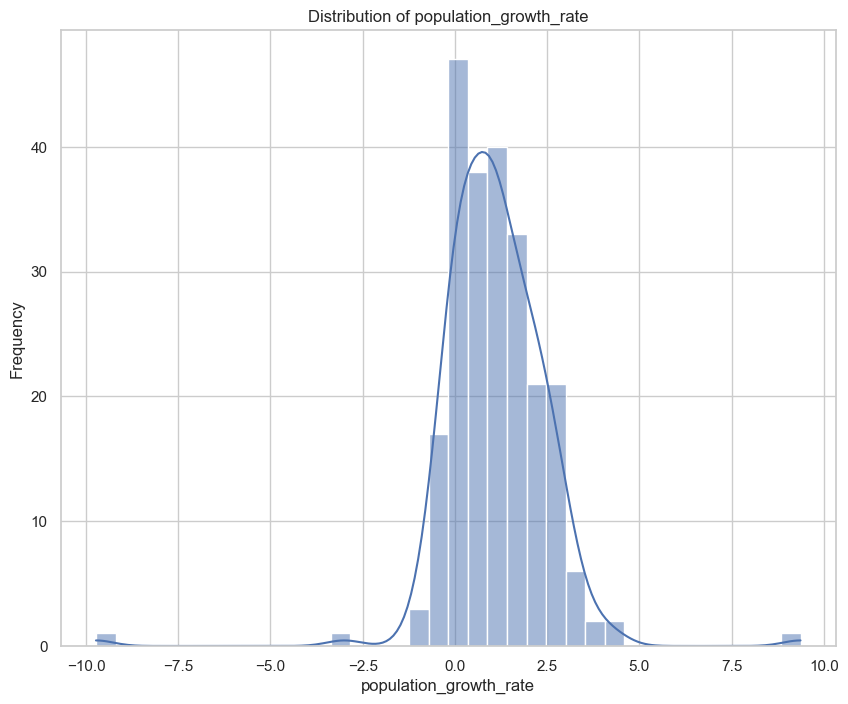

In [22]:
numeric_df = data.select_dtypes(include=['float64'])

num_cols = numeric_df.columns
for col in num_cols:
    plt.figure(figsize=(10, 8))
    sns.histplot(data=numeric_df[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

In [23]:
data.head()

,country,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate
0,Russia,17098242.0,11.87,13.83,7.08,40853000.0,70.16,34.0,1.69,1.424703e+08,-0.03
1,Canada,9984670.0,10.29,8.31,4.71,26960000.0,81.67,12.0,5.66,3.483484e+07,0.76
2,United States,9826675.0,13.42,8.15,6.17,245000000.0,79.56,21.0,2.45,3.188921e+08,0.77
3,China,9596960.0,12.17,7.44,14.79,389000000.0,75.15,37.0,-0.32,1.355693e+09,0.44
4,Brazil,8514877.0,14.72,6.54,19.21,75982000.0,73.28,56.0,-0.15,2.026568e+08,0.80


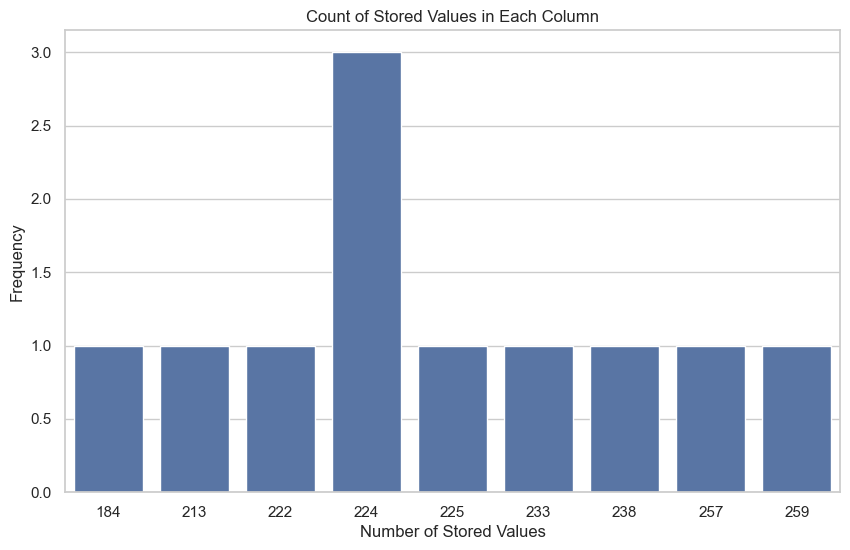

In [30]:
stored_counts = data.notnull().sum()

plt.figure(figsize=(10, 6))
sns.countplot(x=stored_counts.values)
plt.title('Count of Stored Values in Each Column')
plt.xlabel('Number of Stored Values')
plt.ylabel('Frequency')
plt.show()

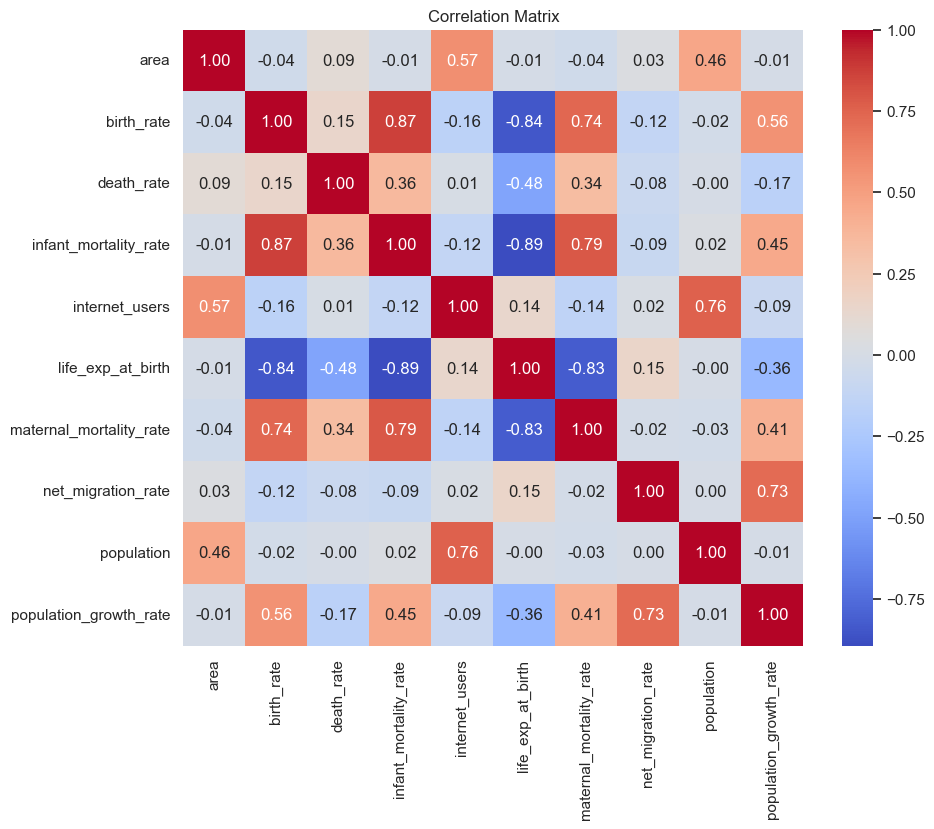

In [32]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 2. Feature Engineering for Missing Data

**TASK: What countries have NaN for Agriculture? What is the main aspect of these countries?**

In [33]:
data.isna().sum()

country                     0
area                        2
birth_rate                 35
death_rate                 34
infant_mortality_rate      35
internet_users             46
life_exp_at_birth          35
maternal_mortality_rate    75
net_migration_rate         37
population                 21
population_growth_rate     26
dtype: int64

**TASK: Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

**TASK:Use the same method for the missing values in Literacy.**

In [44]:
df = pd.DataFrame(data)

columns_with_missing_values = [
    'area', 'birth_rate', 'death_rate', 'infant_mortality_rate', 
    'internet_users', 'life_exp_at_birth', 'maternal_mortality_rate', 
    'net_migration_rate', 'population', 'population_growth_rate'
]

for col in columns_with_missing_values:
    df[col] = df.groupby('country')[col].transform(lambda x: x.fillna(x.mean()))

print("Missing values after group mean filling:")
print(df.isnull().sum())

df[columns_with_missing_values] = df[columns_with_missing_values].apply(lambda x: x.fillna(x.mean()))

Missing values after group mean filling:
country                    0
area                       0
birth_rate                 0
death_rate                 0
infant_mortality_rate      0
internet_users             0
life_exp_at_birth          0
maternal_mortality_rate    0
net_migration_rate         0
population                 0
population_growth_rate     0
dtype: int64


In [45]:
print("Missing values after overall mean filling:")
print(df.isnull().sum())

missing_values = df.isnull().sum()
print("Missing values after overall mean filling:")
print(missing_values)

Missing values after overall mean filling:
country                    0
area                       0
birth_rate                 0
death_rate                 0
infant_mortality_rate      0
internet_users             0
life_exp_at_birth          0
maternal_mortality_rate    0
net_migration_rate         0
population                 0
population_growth_rate     0
dtype: int64
Missing values after overall mean filling:
country                    0
area                       0
birth_rate                 0
death_rate                 0
infant_mortality_rate      0
internet_users             0
life_exp_at_birth          0
maternal_mortality_rate    0
net_migration_rate         0
population                 0
population_growth_rate     0
dtype: int64


# 3. Data Feature Preparation

**TASK: Create a dummy variable to all categorical data.**

In [60]:
X = pd.get_dummies(data)
X.head()

,area,birth_rate,death_rate,infant_mortality_rate,internet_users,life_exp_at_birth,maternal_mortality_rate,net_migration_rate,population,population_growth_rate,...,country_Venezuela,country_Vietnam,country_Virgin Islands,country_Wake Island,country_Wallis and Futuna,country_West Bank,country_Western Sahara,country_Yemen,country_Zambia,country_Zimbabwe
0,9.820524,-0.868111,2.137287,-0.779005,1.073438,-0.204171,-0.652472,0.181833,0.901918,-0.842256,...,False,False,False,False,False,False,False,False,False,False
1,5.603858,-1.044206,0.145428,-0.885083,0.615150,1.205657,-0.752174,0.567537,0.020797,-0.253869,...,False,False,False,False,False,False,False,False,False,False
2,5.510204,-0.695359,0.087693,-0.819735,7.807642,0.947209,-0.711387,0.255670,2.346136,-0.246421,...,False,False,False,False,False,False,False,False,False,False
3,5.374037,-0.834675,-0.168506,-0.433913,12.557774,0.407040,-0.638876,-0.013448,10.833553,-0.492203,...,False,False,False,False,False,False,False,False,False,False
4,4.732618,-0.550471,-0.493266,-0.236078,2.232240,0.177989,-0.552770,0.003068,1.394615,-0.224077,...,False,False,False,False,False,False,False,False,False,False


**TASK: For numerical data perform standard scaler.**

In [57]:
numerical_columns = data.select_dtypes(include=['float64', 'int64']).columns

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print(data.head())

         country      area  birth_rate  death_rate  infant_mortality_rate  \
0         Russia  9.820524   -0.868111    2.137287              -0.779005   
1         Canada  5.603858   -1.044206    0.145428              -0.885083   
2  United States  5.510204   -0.695359    0.087693              -0.819735   
3          China  5.374037   -0.834675   -0.168506              -0.433913   
4         Brazil  4.732618   -0.550471   -0.493266              -0.236078   

   internet_users  life_exp_at_birth  maternal_mortality_rate  \
0        1.073438          -0.204171                -0.652472   
1        0.615150           1.205657                -0.752174   
2        7.807642           0.947209                -0.711387   
3       12.557774           0.407040                -0.638876   
4        2.232240           0.177989                -0.552770   

   net_migration_rate  population  population_growth_rate  
0            0.181833    0.901918               -0.842256  
1            0.567537    0

# 4. Creating and Fitting Kmeans Model

**TASK:** 

- Plot the within sum of squares vs. the number of cluster and find the optimal number of clusters.
- Fit a k-means model of the optimum cluster.

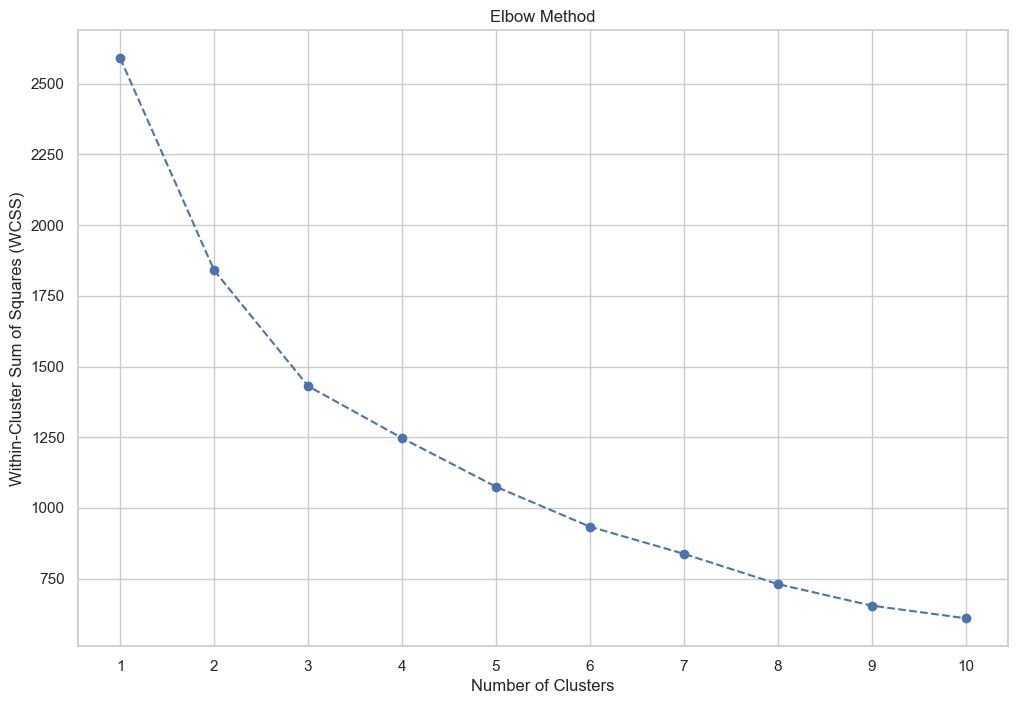

In [69]:
data_copy = pd.DataFrame(data)

cleaned_data = data_copy.copy()
cleaned_data.drop(columns=['country'], inplace=True)

inertia_values = []
for num_clusters in range(1, 11):
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)
    kmeans_model.fit(cleaned_data)
    inertia_values.append(kmeans_model.inertia_)

plt.figure(figsize=(12, 8))
plt.plot(range(1, 11), inertia_values, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 11))
plt.grid(True)
plt.show()

In [72]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans.fit(cleaned_data)

KMeans(n_clusters=3, n_init=10, random_state=42)

Cluster Centers:
 [[-0.10618786 -0.4063274  -0.23059056 -0.42560111 -0.05744116  0.42963878
  -0.35830385  0.00967204 -0.09834656 -0.23110901]
 [ 5.58466096 -0.59310176  0.46387288 -0.29885232  5.79700792  0.16420943
  -0.47572743  0.10920937  5.98453942 -0.36744996]
 [-0.01842379  1.55637436  0.82394834  1.60631914 -0.21559925 -1.61137467
   1.36892562 -0.04409105 -0.07723146  0.88745761]]


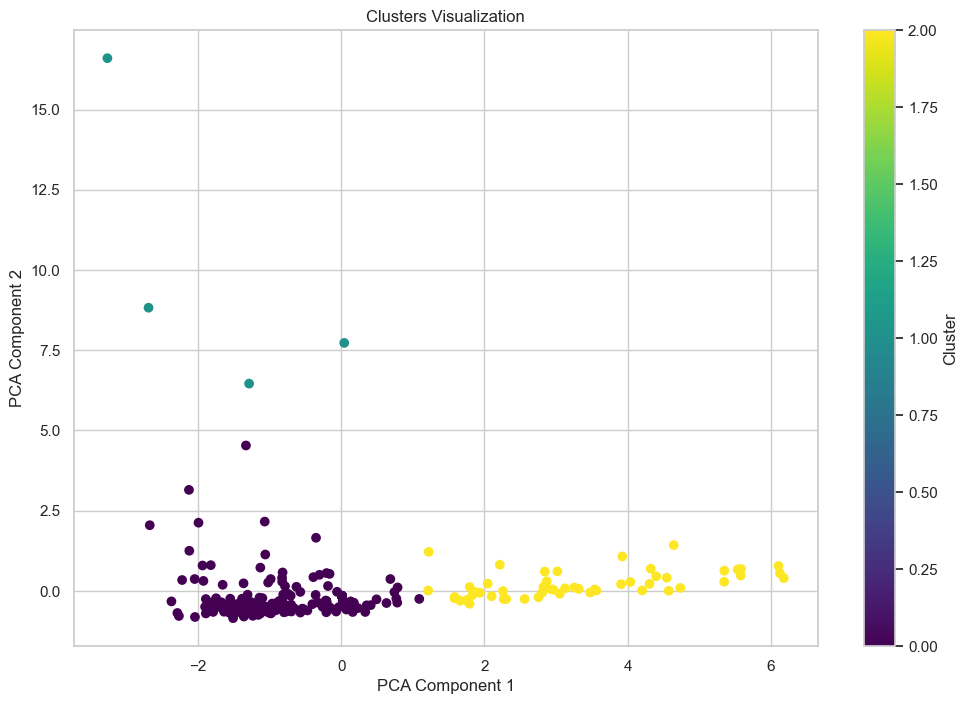

In [77]:
optimal_clusters = 3

kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10)
df['Cluster'] = kmeans_optimal.fit_predict(cleaned_data)

print("Cluster Centers:\n", kmeans_optimal.cluster_centers_)

pca = PCA(n_components=2)
pca_data = pca.fit_transform(cleaned_data)

plt.figure(figsize=(12, 8))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=df['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

-----

# 5. Model Interpretation


**TASK: What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices.**

In determining the optimal number of clusters using the Elbow Method, the plot of Within-Cluster Sum of Squares (WCSS) versus the number of clusters typically shows a noticeable "elbow" point where the rate of decrease in WCSS slows down. This point represents a balance between minimizing the number of clusters and minimizing the variance within each cluster. Based on the plot generated, a common reasonable choice for \( K \) is where this elbow occurs. For example, if the plot shows a significant drop in WCSS up to \( K=3 \) and a smaller rate of decrease beyond this point, \( K=3 \) can be considered a good choice. This suggests that three clusters capture the majority of the structure in the data without overfitting. However, depending on the plot's exact shape, other values such as \( K=4 \) or \( K=5 \) might also be reasonable if the elbow point is not distinctly sharp.

The features that help define these cluster choices are those that exhibit significant variation across different countries and contribute to the overall differentiation between clusters. In this dataset, features like birth_rate, death_rate, internet_users, life_exp_at_birth, and population are likely key contributors. For instance, countries with high birth and death rates might form a distinct cluster compared to countries with low birth and death rates but high internet usage and life expectancy. Similarly, population size can significantly influence clustering since countries with very large populations might exhibit different characteristics from smaller nations. These features, reflecting demographic, economic, and health indicators, are crucial in defining clusters that represent different groups of countries with similar profiles.

---